In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pickle
from MoDE import MoDE
from sklearn.manifold import TSNE, Isomap, MDS
import umap
from metrics import distance_metric, correlation_metric, order_preservation
%load_ext autoreload
%autoreload 2
import pickle

### generate the figure

In [2]:
with open("MoDE_ndim_results/breast_cancer_train_metrics_d.pkl", "rb") as f:
    bc_rd = pickle.load(f)
    
with open("MoDE_ndim_results/small_stock_metrics_d.pkl", "rb") as f:
    small_stock_rd = pickle.load(f)
    
with open("MoDE_ndim_results/wine_train_metrics_d.pkl", "rb") as f:
    wine_rd = pickle.load(f)
    
with open("MoDE_ndim_results/wafer_train_metrics_d.pkl", "rb") as f:
    wafer_rd = pickle.load(f)
    
with open("MoDE_ndim_results/phishing_train_metrics_d.pkl", "rb") as f:
    phishing_rd = pickle.load(f)

In [3]:
bc_rd.keys()

dict_keys(['mode', 'tsne', 'isomap', 'mds', 'umap'])

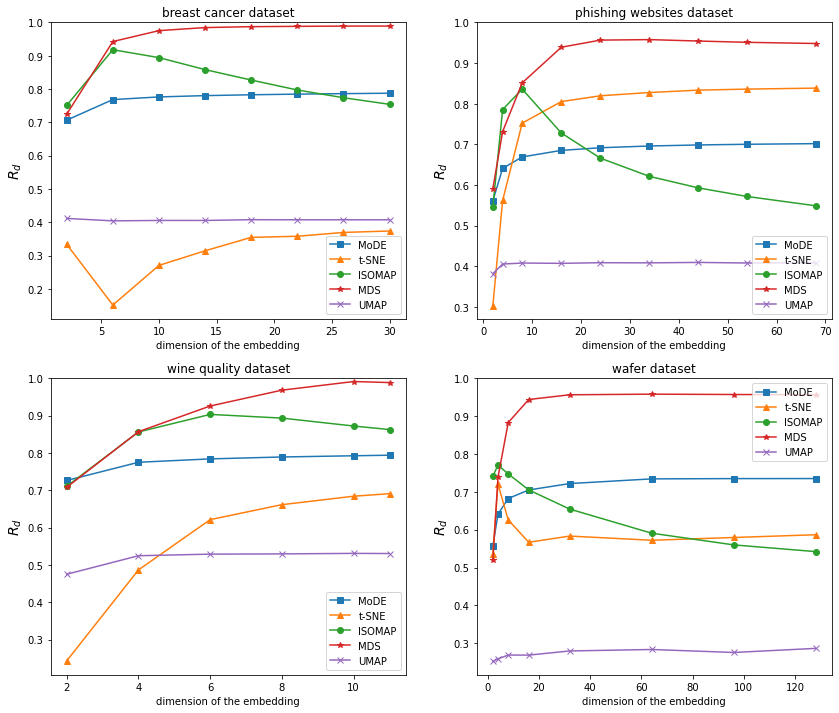

In [4]:
results = [bc_rd, phishing_rd, wine_rd, wafer_rd]
names = ["breast cancer", "phishing websites", "wine quality", "wafer"]
method_names = {"mode": "MoDE", "tsne": "t-SNE", "isomap": "ISOMAP", "mds": "MDS", "umap": "UMAP"}
markers = ["s", "^", "o", "*", "x"]
ranges = [[2, 6, 10, 14, 18, 22, 26, 30],
          [2, 4, 8, 16, 24, 34, 44, 54, 68],
          [2, 4, 6, 8, 10, 11],
          [2, 4, 8, 16, 32, 64, 96, 128]]
fig, ax = plt.subplots(2,2 , figsize=(14, 12))

ax = ax.reshape((1,4))
for i in range(4):
    for j, method in enumerate(bc_rd.keys()):
        ax[0,i].plot(ranges[i], results[i][method], label=method_names[method], marker=markers[j])
    ax[0,i].legend()
    ax[0,i].set_ylim(top=1)
    ax[0,i].set_title(names[i] + " dataset")
    ax[0,i].set_xlabel("dimension of the embedding", fontsize=10)
    ax[0,i].set_ylabel(r"$R_d$", fontsize=14)
ax = ax.reshape((2,2))
plt.savefig("R_d_comparison.jpg", format="jpg", dpi=300);

In [5]:
with open("MoDE_ndim_results/breast_cancer_train_metrics_c.pkl", "rb") as f:
    bc_rc = pickle.load(f)
    
with open("MoDE_ndim_results/small_stock_metrics_c.pkl", "rb") as f:
    small_stock_rc = pickle.load(f)
    
with open("MoDE_ndim_results/wine_train_metrics_c.pkl", "rb") as f:
    wine_rc = pickle.load(f)
    
with open("MoDE_ndim_results/wafer_train_metrics_c.pkl", "rb") as f:
    wafer_rc = pickle.load(f)
    
with open("MoDE_ndim_results/phishing_train_metrics_c.pkl", "rb") as f:
    phishing_rc = pickle.load(f)

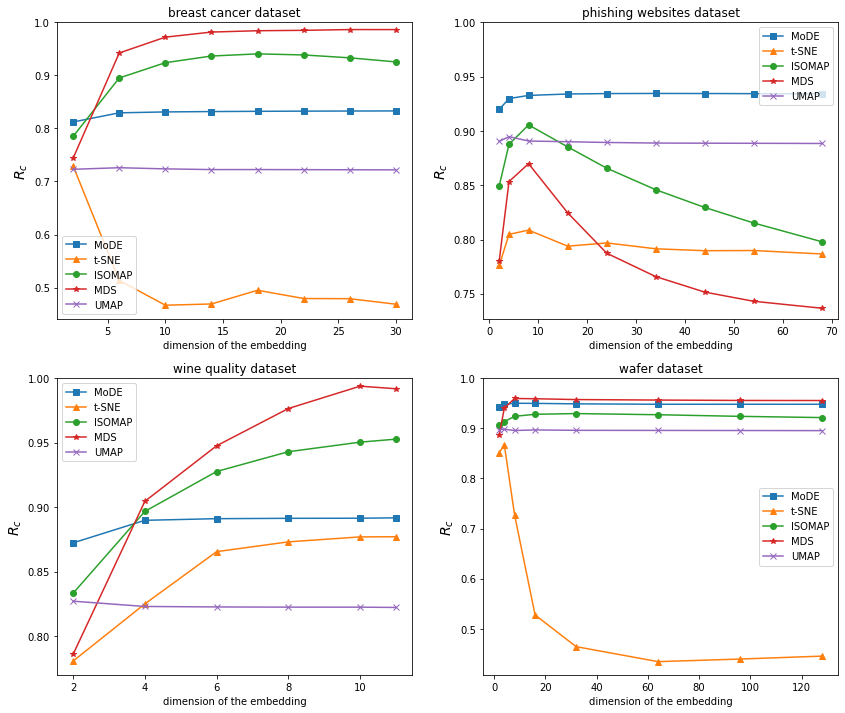

In [6]:
results = [bc_rc, phishing_rc, wine_rc, wafer_rc]
ranges = [[2, 6, 10, 14, 18, 22, 26, 30],
          [2, 4, 8, 16, 24, 34, 44, 54, 68],
          [2, 4, 6, 8, 10, 11],
          [2, 4, 8, 16, 32, 64, 96, 128]]
fig, ax = plt.subplots(2,2 , figsize=(14, 12))

ax = ax.reshape((1,4))
for i in range(4):
    for j, method in enumerate(bc_rd.keys()):
        ax[0,i].plot(ranges[i], results[i][method], label=method_names[method], marker=markers[j])
    ax[0,i].legend()
    ax[0,i].set_ylim(top=1)
    ax[0,i].set_title(names[i] + " dataset")
    ax[0,i].set_xlabel("dimension of the embedding", fontsize=10)
    ax[0,i].set_ylabel(r"$R_c$", fontsize=14)
ax = ax.reshape((2,2))
plt.savefig("R_c_comparison.jpg", format="jpg", dpi=300);

### compare to FastMap

In [96]:
data = loadmat("../MATLAB_implementation/data/breast_cancer_train.mat")["StockData"]
score = loadmat("../MATLAB_implementation/data/breast_cancer_train.mat")["Score"]

In [80]:
#normalize
m = np.mean(data, axis=1)
data = data - m.reshape((-1,1))

s = np.max(data, axis=1) - np.min(data, axis=1)
data = data / s.reshape((-1,1))

In [97]:
data.shape

(455, 30)

In [58]:
n_neighbor=20

In [98]:
# for now using exact distance matrix
from sklearn.metrics import pairwise_distances
dm = pairwise_distances(data, n_jobs=-1)
dm = np.round(dm, decimals=5)
mode = MoDE(n_neighbor=n_neighbor, max_iter=100000, tol=0.0001, n_components=2, verbose=True)
start = time.time()

x_p_mode = mode.fit_transform(data, score.squeeze(), dm, dm)

print("time: ", time.time() - start)

0.005681818181818182
Start of Gradient Descent algorithm
0 out of 100000 iterations has passed
10000 out of 100000 iterations has passed
20000 out of 100000 iterations has passed
GD stopped after 22000 iteration
end of GD algorithm
time:  13.378708600997925


In [83]:
from fastmap import fastmap

In [99]:
dm.shape

(455, 455)

In [100]:
R_d_fastmap = []
R_c_fastmap = []
for i in [2, 6, 10, 14, 18, 22, 26, 30]:
    x_fastmap = fastmap(dm, i)
    R_d_fastmap.append(distance_metric(data, x_fastmap, dm, 20))
    R_c_fastmap.append(correlation_metric(data, x_fastmap, dm, 20))

Picked 222,393 at K=2
Picked 361,109 at K=1
Picked 222,393 at K=6
Picked 361,109 at K=5
Picked 222,393 at K=4
Picked 350,431 at K=3
Picked 294,361 at K=2
Picked 140,361 at K=1
Picked 222,393 at K=10
Picked 222,393 at K=9
Picked 105,361 at K=8
Picked 276,431 at K=7
Picked 276,431 at K=6
Picked 111,431 at K=5
Picked 361,294 at K=4
Picked 276,431 at K=3
Picked 409,431 at K=2
Picked 361,294 at K=1
Picked 222,393 at K=14
Picked 222,393 at K=13
Picked 271,109 at K=12
Picked 105,361 at K=11
Picked 40,431 at K=10
Picked 40,431 at K=9
Picked 105,431 at K=8
Picked 454,222 at K=7
Picked 361,294 at K=6
Picked 361,294 at K=5
Picked 105,431 at K=4
Picked 294,361 at K=3
Picked 40,431 at K=2
Picked 454,222 at K=1
Picked 222,393 at K=18
Picked 222,393 at K=17
Picked 276,431 at K=16
Picked 105,361 at K=15
Picked 276,431 at K=14
Picked 361,294 at K=13
Picked 111,431 at K=12
Picked 140,361 at K=11
Picked 361,294 at K=10
Picked 109,271 at K=9
Picked 361,294 at K=8
Picked 271,109 at K=7
Picked 40,431 at K=6

Text(0, 0.5, '$R_c$')

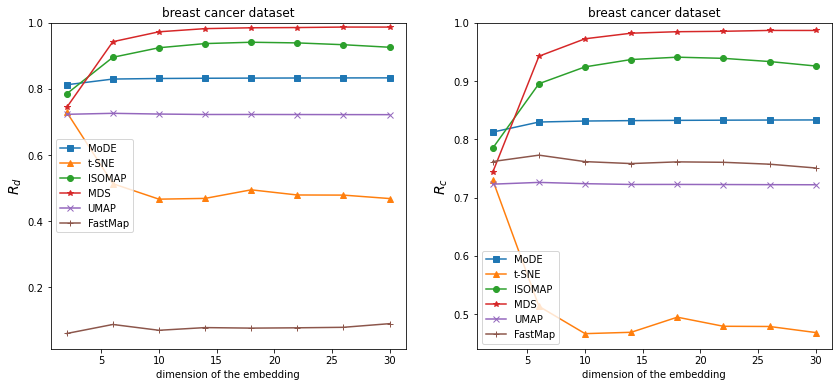

In [107]:
fig, ax = plt.subplots(1,2 , figsize=(14, 6))
for j, method in enumerate(bc_rd.keys()):
    ax[0].plot(ranges[0], results[0][method], label=method_names[method], marker=markers[j])
ax[0].plot(ranges[0], R_d_fastmap, label="FastMap", marker="+")
ax[0].legend()
ax[0].set_ylim(top=1)
ax[0].set_title(names[0] + " dataset")
ax[0].set_xlabel("dimension of the embedding", fontsize=10)
ax[0].set_ylabel(r"$R_d$", fontsize=14)
for j, method in enumerate(bc_rc.keys()):
    ax[1].plot(ranges[0], results[0][method], label=method_names[method], marker=markers[j])
ax[1].plot(ranges[0], R_c_fastmap, label="FastMap", marker="+")
ax[1].legend()
ax[1].set_ylim(top=1)
ax[1].set_title(names[0] + " dataset")
ax[1].set_xlabel("dimension of the embedding", fontsize=10)
ax[1].set_ylabel(r"$R_c$", fontsize=14)

### synthetic dataset

In [109]:
from sklearn.datasets import make_classification

In [119]:
syn_x, syn_y = make_classification(n_samples=200, n_features=10, n_informative=10, n_redundant=0, n_classes=5, 
                                   n_clusters_per_class=1, flip_y=0)

In [120]:
syn_dm = pairwise_distances(syn_x, n_jobs=-1)
syn_dm = np.round(syn_dm, decimals=5)

In [122]:
mode = MoDE(n_neighbor=n_neighbor, max_iter=100000, tol=0.0001, n_components=10, verbose=True)
start = time.time()

syn_mode = mode.fit_transform(syn_x, syn_y, syn_dm, syn_dm)

print("time: ", time.time() - start)

0.005747126436781609
Start of Gradient Descent algorithm
0 out of 100000 iterations has passed
GD stopped after 6000 iteration
end of GD algorithm
0.005747126436781609
Start of Gradient Descent algorithm
0 out of 100000 iterations has passed
GD stopped after 6000 iteration
end of GD algorithm
False
0.005747126436781609
Start of Gradient Descent algorithm
0 out of 100000 iterations has passed
GD stopped after 6000 iteration
end of GD algorithm
False
0.005747126436781609
Start of Gradient Descent algorithm
0 out of 100000 iterations has passed
GD stopped after 6000 iteration
end of GD algorithm
False
0.005747126436781609
Start of Gradient Descent algorithm
0 out of 100000 iterations has passed
GD stopped after 6000 iteration
end of GD algorithm
False
0.005747126436781609
Start of Gradient Descent algorithm
0 out of 100000 iterations has passed
GD stopped after 6000 iteration
end of GD algorithm
False
0.005747126436781609
Start of Gradient Descent algorithm
0 out of 100000 iterations has 

In [124]:
R_d_syn_mode = []
R_c_syn_mode = []
data_norms = np.linalg.norm(syn_x, axis=1)
for p in range(2,11):
    x_p = mode.to_hyper_spherical(data_norms, mode.P[:, :p-1])
    R_d_syn_mode.append(distance_metric(syn_x, x_p, syn_dm, n_neighbor=n_neighbor))
    R_c_syn_mode.append(correlation_metric(syn_x, x_p, syn_dm, n_neighbor=n_neighbor))

(0.3, 1.0)

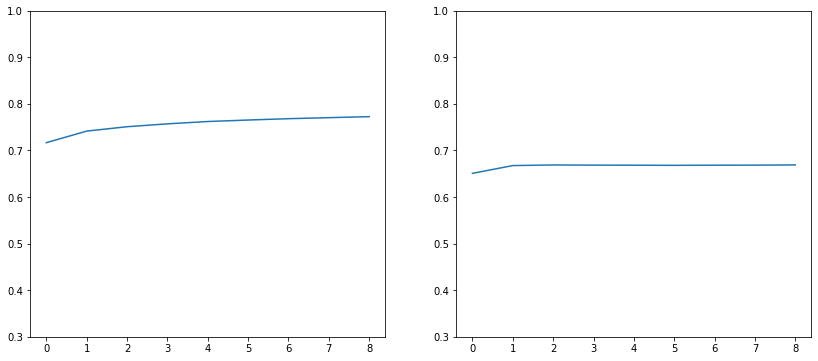

In [128]:
fig, ax = plt.subplots(1,2 , figsize=(14, 6))
ax[0].plot(R_d_syn_mode)
ax[0].set_ylim([0.3, 1])
ax[1].plot(R_c_syn_mode)
ax[1].set_ylim([0.3, 1])

In [133]:
R_d_syn_mode

[0.7166465562076492,
 0.7414679987304781,
 0.7508587148433293,
 0.7570296982529351,
 0.7620403416293335,
 0.7652232059273566,
 0.7681077791237463,
 0.7703172072093419,
 0.7724443756146973]